<a href="https://colab.research.google.com/github/sagar2582/Sentiment-Analysis-of-Tweets/blob/main/Tweets(Sentimental_Analysis).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# <u><b> Objective </b></u>
## <b> You are given a data of US Airline tweets and their sentiment. The task is to do sentiment analysis about the problems of each major U.S. airline. Twitter data was scraped from February of 2015 and contributors were asked to first classify positive, negative, and neutral tweets, followed by categorizing negative reasons (such as "late flight" or "rude service"). </b>

<br>
<br>

## <b>Things to do :</b>
* ### Read the tweets.csv data, clean and tokenize the tweets using nltk library.
* ### Count vectorize the tweets so that you end up with a sparse matrix (which will be your $X$). 
* ### You are supposed to build a SVM classifier (a binary classification in fact). Since the data contains three levels of sentiment(positive, negative and neutral), you should remove the sentences which are neutral. Once you do that you will have two classes only (positive and negative). You can set the label of positive tweets to 1 and negative tweets to 0.
* ### Once you have built the SVM classifier, evaluate this model across various metrics. Also plot the ROC curve and Precision-Recall curve. Report the areas under these two curves along with other metrics.
* ### Perform GridSearch cross validation for various values of $C$ and $gamma$. These will be the hyperparameters which you would play around with.
* ### Explain your observations and the underlying reasons for these.
* ### Try checking if <code>tfidfvectorizer</code> helps you gain lift in model's performance.




In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_auc_score, plot_precision_recall_curve

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
# Importing the dataset

df = pd.read_csv('/content/drive/My Drive/Colab Notebooks/4.13 Support Vector Machines/Tweets.csv')

In [4]:
# First look 

df.head()

,tweet_id,airline_sentiment,airline_sentiment_confidence,negativereason,negativereason_confidence,airline,airline_sentiment_gold,name,negativereason_gold,retweet_count,text,tweet_coord,tweet_created,tweet_location,user_timezone
0,570306133677760513,neutral,1.0000,NaN,NaN,Virgin America,NaN,cairdin,NaN,0,@VirginAmerica What @dhepburn said.,NaN,2015-02-24 11:35:52 -0800,NaN,Eastern Time (US & Canada)
1,570301130888122368,positive,0.3486,NaN,0.0000,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica plus you've added commercials t...,NaN,2015-02-24 11:15:59 -0800,NaN,Pacific Time (US & Canada)
2,570301083672813571,neutral,0.6837,NaN,NaN,Virgin America,NaN,yvonnalynn,NaN,0,@VirginAmerica I didn't today... Must mean I n...,NaN,2015-02-24 11:15:48 -0800,Lets Play,Central Time (US & Canada)
3,570301031407624196,negative,1.0000,Bad Flight,0.7033,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica it's really aggressive to blast...,NaN,2015-02-24 11:15:36 -0800,NaN,Pacific Time (US & Canada)
4,570300817074462722,negative,1.0000,Can't Tell,1.0000,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica and it's a really big bad thing...,NaN,2015-02-24 11:14:45 -0800,NaN,Pacific Time (US & Canada)


In [5]:
df.tail()

,tweet_id,airline_sentiment,airline_sentiment_confidence,negativereason,negativereason_confidence,airline,airline_sentiment_gold,name,negativereason_gold,retweet_count,text,tweet_coord,tweet_created,tweet_location,user_timezone
14635,569587686496825344,positive,0.3487,NaN,0.0000,American,NaN,KristenReenders,NaN,0,@AmericanAir thank you we got on a different f...,NaN,2015-02-22 12:01:01 -0800,NaN,NaN
14636,569587371693355008,negative,1.0000,Customer Service Issue,1.0000,American,NaN,itsropes,NaN,0,@AmericanAir leaving over 20 minutes Late Flig...,NaN,2015-02-22 11:59:46 -0800,Texas,NaN
14637,569587242672398336,neutral,1.0000,NaN,NaN,American,NaN,sanyabun,NaN,0,@AmericanAir Please bring American Airlines to...,NaN,2015-02-22 11:59:15 -0800,"Nigeria,lagos",NaN
14638,569587188687634433,negative,1.0000,Customer Service Issue,0.6659,American,NaN,SraJackson,NaN,0,"@AmericanAir you have my money, you change my ...",NaN,2015-02-22 11:59:02 -0800,New Jersey,Eastern Time (US & Canada)
14639,569587140490866689,neutral,0.6771,NaN,0.0000,American,NaN,daviddtwu,NaN,0,@AmericanAir we have 8 ppl so we need 2 know h...,NaN,2015-02-22 11:58:51 -0800,"dallas, TX",NaN


In [6]:
df.shape

(14640, 15)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14640 entries, 0 to 14639
Data columns (total 15 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   tweet_id                      14640 non-null  int64  
 1   airline_sentiment             14640 non-null  object 
 2   airline_sentiment_confidence  14640 non-null  float64
 3   negativereason                9178 non-null   object 
 4   negativereason_confidence     10522 non-null  float64
 5   airline                       14640 non-null  object 
 6   airline_sentiment_gold        40 non-null     object 
 7   name                          14640 non-null  object 
 8   negativereason_gold           32 non-null     object 
 9   retweet_count                 14640 non-null  int64  
 10  text                          14640 non-null  object 
 11  tweet_coord                   1019 non-null   object 
 12  tweet_created                 14640 non-null  object 
 13  t

### We are mainly concerned about airline_sentiment and Text column

In [8]:
df.describe()

,tweet_id,airline_sentiment_confidence,negativereason_confidence,retweet_count
count,1.464000e+04,14640.000000,10522.000000,14640.000000
mean,5.692184e+17,0.900169,0.638298,0.082650
std,7.791112e+14,0.162830,0.330440,0.745778
min,5.675883e+17,0.335000,0.000000,0.000000
25%,5.685592e+17,0.692300,0.360600,0.000000
50%,5.694779e+17,1.000000,0.670600,0.000000
75%,5.698905e+17,1.000000,1.000000,0.000000
max,5.703106e+17,1.000000,1.000000,44.000000


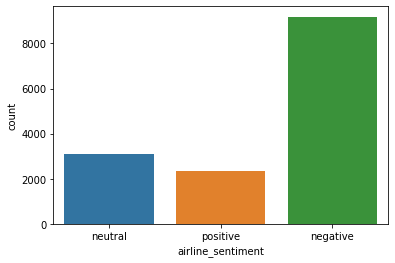

In [9]:
sns.countplot(x=df['airline_sentiment'])
plt.show()

Most of the tweets are negative

In [10]:
# Creating a dataframe to know about the length distribustion of the tweets

df['length'] = df['text'].apply(len)

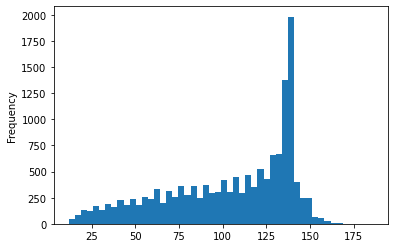

In [11]:
df['length'].plot(bins = 50, kind = 'hist')

In [12]:
df['length'].describe()

count    14640.000000
mean       103.822063
std         36.277339
min         12.000000
25%         77.000000
50%        114.000000
75%        136.000000
max        186.000000
Name: length, dtype: float64

In [13]:
df[df['length'] == 186]['text'].iloc[0]

"@USAirways Eyyyy! Cancelled Flightlations, Flight Booking Problemss, reFlight Booking Problemss, but y'all got me on the same flight out tonight (not tomorrow) &amp; the FC upgrade. Thx!"

# Text Preprocessing

In [14]:
#Get rid of stop words and punctuations

import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [15]:
import string 
from nltk.corpus import stopwords

In [16]:
stopset = stopwords.words('english')

In [17]:
# Function to remove punctuations

def text_process(msg):

  nopunc = [char for char in msg if char not in string.punctuation]
  nopunc = ''.join(nopunc)
  return ' '.join([word for word in nopunc.split() if word.lower not in stopset])

# Tokenization

In [18]:
pd.set_option('display.max_colwidth', -1)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: Passing a negative integer is deprecated in version 1.0 and will not be supported in future version. Instead, use None to not limit the column width.
  """Entry point for launching an IPython kernel.


In [19]:
#Remove punctuations and special characters and stop words.

df['tokenized_tweet'] = df['text'].apply(text_process)

#**No neutrals allowed!**

In [20]:
df = df[df.airline_sentiment != 'neutral'].reset_index()

##**Let's just get rid of unwanted columns..its time.**

In [21]:
tweet = df[['airline_sentiment','tokenized_tweet','length']]

In [22]:
tweet.head()

,airline_sentiment,tokenized_tweet,length
0,positive,VirginAmerica plus youve added commercials to the experience tacky,72
1,negative,VirginAmerica its really aggressive to blast obnoxious entertainment in your guests faces amp they have little recourse,126
2,negative,VirginAmerica and its a really big bad thing about it,55
3,negative,VirginAmerica seriously would pay 30 a flight for seats that didnt have this playing its really the only bad thing about flying VA,135
4,positive,VirginAmerica yes nearly every time I fly VX this “ear worm” won’t go away,79


In [23]:
tweet.tail()

,airline_sentiment,tokenized_tweet,length
11536,negative,AmericanAir my flight was Cancelled Flightled leaving tomorrow morning Auto rebooked for a Tuesday night flight but need to arrive Monday,141
11537,negative,AmericanAir right on cue with the delays👌,42
11538,positive,AmericanAir thank you we got on a different flight to Chicago,63
11539,negative,AmericanAir leaving over 20 minutes Late Flight No warnings or communication until we were 15 minutes Late Flight Thats called shitty customer svc,150
11540,negative,AmericanAir you have my money you change my flight and dont answer your phones Any other suggestions so I can make my commitment,135


In [24]:
tweet.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11541 entries, 0 to 11540
Data columns (total 3 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   airline_sentiment  11541 non-null  object
 1   tokenized_tweet    11541 non-null  object
 2   length             11541 non-null  int64 
dtypes: int64(1), object(2)
memory usage: 270.6+ KB


##**Vectorization**

In [42]:
from sklearn.feature_extraction.text import CountVectorizer
vectorizer = CountVectorizer()

In [43]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(tweet['tokenized_tweet'], tweet['airline_sentiment'], test_size = 0.4)

In [44]:
X_train.head()

4374    SouthwestAir you guys just rip me off if I could Cancelled Flight every flight I had booked for my employees I would Buyer beware   
3123    united why havent you updated that flight 4411 is delayed Super frustrating                                                         
2457    united huge kudos to the FO of Sundays flt 1623 sjoiad Handed my daughter her first pair of wings Keeping traditions alive          
1286    united Poor cabin luggage service on UA1266 to BOS I was forced to check in even when there was empty space for bags in the overhead
3238    united Useless response I need a functioning wheelchair not a customer care form to fill out                                        
Name: tokenized_tweet, dtype: object

In [45]:
X_test.head()

10160    AmericanAir Ive been calling you for 3 straight days and no one picks up Sure there are storms but there are also customers Holler            
11390    AmericanAir Fantastic support by the Twitter team I appreciate it Thanks again                                                                
6775     USAirways Ive been on hold to rebook a Cancelled Flighted flight for over two hours I know weather has a huge impact but you should anticipate
7803     USAirways why dont you hire people to deal with the call volume this is absolute garbage incompetent                                          
2811     united she said she would need to get a supervisor While waiting for the supervisor she hung up on me                                         
Name: tokenized_tweet, dtype: object

In [46]:
train_vectorized = vectorizer.fit_transform(X_train)
test_vectorized = vectorizer.transform(X_test)

In [47]:
train_vectorized

<6924x10243 sparse matrix of type '<class 'numpy.int64'>'
	with 114585 stored elements in Compressed Sparse Row format>

In [48]:
test_vectorized

<4617x10243 sparse matrix of type '<class 'numpy.int64'>'
	with 72224 stored elements in Compressed Sparse Row format>

In [49]:
# Importing Support Vector Machines

from sklearn import svm
clf = svm.SVC()

In [50]:
clf.fit(train_vectorized, y_train)

SVC()

In [51]:
train_pred=clf.predict(train_vectorized)

In [52]:
test_pred=clf.predict(test_vectorized)

In [54]:
# Confusion matrices for train and test 

print(confusion_matrix(y_train,train_pred))
print()
print(confusion_matrix(y_test,test_pred))

[[5479   21]
 [ 196 1228]]

[[3598   80]
 [ 322  617]]


##**Roc and precison recall curve for train data.**

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


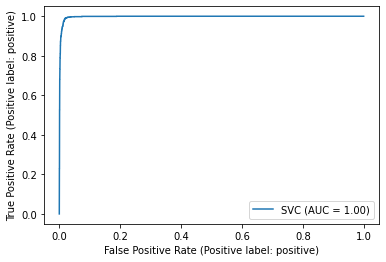

In [55]:
from sklearn import datasets, metrics, model_selection, svm
metrics.plot_roc_curve(clf, train_vectorized, y_train)  

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_precision_recall_curve is deprecated; Function `plot_precision_recall_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: PrecisionRecallDisplay.from_predictions or PrecisionRecallDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


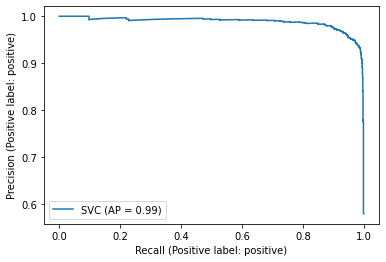

In [56]:
metrics.plot_precision_recall_curve(clf, train_vectorized, y_train)

##**Roc and precison recall curve for test data.**

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


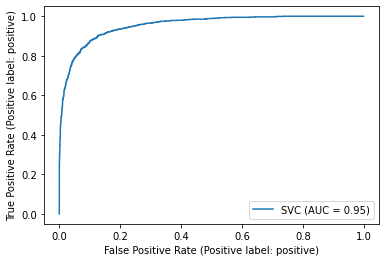

In [57]:
metrics.plot_roc_curve(clf, test_vectorized, y_test)  

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_precision_recall_curve is deprecated; Function `plot_precision_recall_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: PrecisionRecallDisplay.from_predictions or PrecisionRecallDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


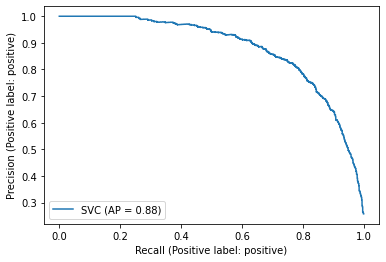

In [58]:
metrics.plot_precision_recall_curve(clf, test_vectorized, y_test)

In [59]:
# Print the classification report for train and test
print(classification_report(y_train,train_pred))
print("\n")
print(classification_report(y_test,test_pred))

              precision    recall  f1-score   support

    negative       0.97      1.00      0.98      5500
    positive       0.98      0.86      0.92      1424

    accuracy                           0.97      6924
   macro avg       0.97      0.93      0.95      6924
weighted avg       0.97      0.97      0.97      6924



              precision    recall  f1-score   support

    negative       0.92      0.98      0.95      3678
    positive       0.89      0.66      0.75       939

    accuracy                           0.91      4617
   macro avg       0.90      0.82      0.85      4617
weighted avg       0.91      0.91      0.91      4617



##**Grid Search CV**

In [60]:
from sklearn.model_selection import GridSearchCV 

param_dict = {'C': [0.1, 1, 10, 1000],  
              'gamma': [1, 0.1, 0.01, 0.0001], 
              'kernel': ['rbf','linear','poly']} 

In [61]:
grid = GridSearchCV(clf, param_dict,n_jobs=2, cv=5, verbose = 10,scoring='accuracy') 

In [62]:
grid.fit(train_vectorized, y_train)

Fitting 5 folds for each of 48 candidates, totalling 240 fits


GridSearchCV(cv=5, estimator=SVC(), n_jobs=2,
             param_grid={'C': [0.1, 1, 10, 1000],
                         'gamma': [1, 0.1, 0.01, 0.0001],
                         'kernel': ['rbf', 'linear', 'poly']},
             scoring='accuracy', verbose=10)

In [63]:
# Best Parameters are:

grid.best_params_

{'C': 10, 'gamma': 0.01, 'kernel': 'rbf'}

In [64]:
g_pred_tr=grid.predict(train_vectorized)

In [65]:
g_pred_test=grid.predict(test_vectorized)

In [66]:
# Confusion matrices for train and test 

print(confusion_matrix(y_train,g_pred_tr))
print(confusion_matrix(y_test,g_pred_test))

[[5477   23]
 [  72 1352]]
[[3531  147]
 [ 225  714]]
